In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# Reading a csv into Pandas

In [2]:
df = pd.read_csv('iris.csv', header=0)
# If there are no column names you can set header to None. 

# Getting first x rows.

In [3]:
df.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


# Getting last x rows.

In [4]:
df.tail(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


# Changing column labels.

In [5]:
df.columns = ['idx','sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


# Finding out how many rows dataset has.

In [6]:
len(df)

150

# Finding out basic statistical information on your dataset.

In [7]:
pd.options.display.float_format = '{:,.3f}'.format 
# Limit output to 3 decimal places.
df.describe()

,idx,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000,150.000
mean,75.500,5.843,3.057,3.758,1.199
std,43.445,0.828,0.436,1.765,0.762
min,1.000,4.300,2.000,1.000,0.100
25%,38.250,5.100,2.800,1.600,0.300
50%,75.500,5.800,3.000,4.350,1.300
75%,112.750,6.400,3.300,5.100,1.800
max,150.000,7.900,4.400,6.900,2.500


In [8]:
df.cov()

,idx,sepal_length,sepal_width,petal_length,petal_width
idx,"1,887.500",25.783,-7.618,67.693,29.805
sepal_length,25.783,0.686,-0.042,1.274,0.516
sepal_width,-7.618,-0.042,0.190,-0.330,-0.122
petal_length,67.693,1.274,-0.330,3.116,1.296
petal_width,29.805,0.516,-0.122,1.296,0.581


In [9]:
df.corr()

,idx,sepal_length,sepal_width,petal_length,petal_width
idx,1.000,0.717,-0.402,0.883,0.900
sepal_length,0.717,1.000,-0.118,0.872,0.818
sepal_width,-0.402,-0.118,1.000,-0.428,-0.366
petal_length,0.883,0.872,-0.428,1.000,0.963
petal_width,0.900,0.818,-0.366,0.963,1.000


# Getting a column by label

In [10]:
df['sepal_length'].head(2)

0   5.100
1   4.900
Name: sepal_length, dtype: float64

# Getting a column by label using .

In [11]:
df.sepal_length.head(2)

0   5.100
1   4.900
Name: sepal_length, dtype: float64

# Creating a series of booleans based on a conditional

In [12]:
boolean = df.sepal_length < 5
boolean.head(2)
# Or df['sepal_length'] < 5

0    False
1     True
Name: sepal_length, dtype: bool

# Using a series of booleans to filter

In [13]:
df[df.sepal_length < 5].head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa


In [14]:
df[~(df.sepal_length < 5)].head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
4,5,5.000,3.600,1.400,0.200,setosa


# Filtering by multiple conditionals

In [15]:
df[(df.sepal_length < 5) & (df.sepal_width > 3)].head(2)
# Can't use the keyword 'and'

,idx,sepal_length,sepal_width,petal_length,petal_width,species
2,3,4.700,3.200,1.300,0.200,setosa
3,4,4.600,3.100,1.500,0.200,setosa


In [16]:
df[(df.sepal_length < 5) | (df.sepal_width > 3)].head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa


# Filtering by string methods

In [17]:
df[df.species.str.startswith('seto')].head(3)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa


# Getting a row via a numerical index

In [18]:
df.iloc[30]

idx                 31
sepal_length     4.800
sepal_width      3.100
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

# Setting a new index from an existing column

In [19]:
df = df.set_index(['idx'])
# This will make the column ‘idx’ an index.
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
idx,,,,,
1,5.100,3.500,1.400,0.200,setosa
2,4.900,3.000,1.400,0.200,setosa
3,4.700,3.200,1.300,0.200,setosa
4,4.600,3.100,1.500,0.200,setosa
5,5.000,3.600,1.400,0.200,setosa


# Getting a row via a label-based index

In [20]:
df.loc[30]
# This, like iloc will return a series of the row you reference. 
# The only difference is this time you are using label based 
# referencing not numerical based.
# Note: idx starts from 1 while index starts from 0

sepal_length     4.700
sepal_width      3.200
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

# Getting a row via a label-based or numerical index

In [21]:
df.ix[30] 
# Label based with numerical index fallback 
# *Not recommended

sepal_length     4.700
sepal_width      3.200
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

# sort index

In [22]:
df.sort_index(ascending=False).head(5) 
#inplace=True to apple the sorting in place

,sepal_length,sepal_width,petal_length,petal_width,species
idx,,,,,
150,5.900,3.000,5.100,1.800,virginica
149,6.200,3.400,5.400,2.300,virginica
148,6.500,3.000,5.200,2.000,virginica
147,6.300,2.500,5.000,1.900,virginica
146,6.700,3.000,5.200,2.300,virginica


# Returning an index to data

In [23]:
df = df.reset_index('idx')
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa
3,4,4.600,3.100,1.500,0.200,setosa
4,5,5.000,3.600,1.400,0.200,setosa


# Selecting a subset of columns

In [24]:
df[['sepal_length', 'sepal_width']].head(2)

,sepal_length,sepal_width
0,5.100,3.500
1,4.900,3.000


# Add random date column

In [25]:
year = np.random.randint(low=1980,high=2016,size=len(df))
month = np.random.randint(low=1,high=13,size=len(df))
date = []
for y, m in zip(year, month):
    y = str(y)
    m = str(m)
    date.append('/'.join((y, m)))

In [26]:
df['date'] = pd.Series(date, index=df.index)
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date
0,1,5.100,3.500,1.400,0.200,setosa,2011/11
1,2,4.900,3.000,1.400,0.200,setosa,1989/1
2,3,4.700,3.200,1.300,0.200,setosa,1990/11
3,4,4.600,3.100,1.500,0.200,setosa,1998/9
4,5,5.000,3.600,1.400,0.200,setosa,1998/9


# Applying a function to a column

In [27]:
def get_year(date):
    year = date[:4]
    year= pd.to_datetime(year).year
    return year
 
df['year'] = df.date.apply(get_year)
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year
0,1,5.100,3.500,1.400,0.200,setosa,2011/11,2011
1,2,4.900,3.000,1.400,0.200,setosa,1989/1,1989
2,3,4.700,3.200,1.300,0.200,setosa,1990/11,1990
3,4,4.600,3.100,1.500,0.200,setosa,1998/9,1998
4,5,5.000,3.600,1.400,0.200,setosa,1998/9,1998


In [28]:
df[['sepal_length','sepal_width']].apply(np.sqrt).head(2)

,sepal_length,sepal_width
0,2.258,1.871
1,2.214,1.732


# Grouby

In [29]:
df.groupby(df.year // 10 * 10).describe()
# 按年代分组， 再获得每组的统计值

idx  sepal_length  sepal_width  petal_length  petal_width  \
year                                                                       
1980 count  51.000        51.000       51.000        51.000       51.000   
     mean   79.196         5.763        3.090         3.682        1.192   
     std    45.296         0.900        0.407         1.887        0.851   
     min     2.000         4.400        2.300         1.200        0.100   
     25%    38.500         5.000        2.800         1.500        0.200   
     50%    86.000         5.700        3.000         4.200        1.300   
     75%   116.000         6.300        3.350         5.150        1.950   
     max   149.000         7.700        4.100         6.700        2.500   
1990 count  32.000        32.000       32.000        32.000       32.000   
     mean   71.312         5.753        3.047         3.603        1.134   
     std    45.164         0.828        0.472         1.858        0.753   
     min     3.000         4.600        2.300         1.000        0.100   
     25%    32.750         5.000        2.800         1.500        0.275   
     50%    69.000         5.800        3.000         4.100        1.300   
     75%   110.500         6.400        3.250         5.100        1.800   
     max   150.000         7.700        4.400         6.900        2.400   
2000 count  45.000        45.000       45.000        45.000       45.000   
     mean   75.556         5.964        3.029         3.967        1.267   
     std    41.313         0.797        0.452         1.639        0.707   
     min     7.000         4.300        2.000         1.100        0.100   
     25%    45.000         5.400        2.700         1.900        0.400   
     50%    70.000         5.800        3.000         4.500        1.400   
     75%   106.000         6.600        3.300         5.100        1.900   
     max   147.000         7.900        3.900         6.600        2.400   
2010 count  22.000        22.000       22.000        22.000       22.000   
     mean   72.909         5.914        3.055         3.732        1.173   
     std    43.048         0.726        0.439         1.662        0.703   
     min     1.000         5.000        2.200         1.200        0.200   
     25%    39.500         5.425        2.800         1.700        0.425   
     50%    79.000         5.900        3.000         4.500        1.350   
     75%   110.000         6.300        3.300         4.800        1.575   
     max   139.000         7.700        3.900         6.100        2.300   

                year  
year                  
1980 count    51.000  
     mean  1,984.275  
     std       2.786  
     min   1,980.000  
     25%   1,982.000  
     50%   1,984.000  
     75%   1,987.000  
     max   1,989.000  
1990 count    32.000  
     mean  1,994.156  
     std       3.204  
     min   1,990.000  
     25%   1,991.000  
     50%   1,993.500  
     75%   1,997.000  
     max   1,999.000  
2000 count    45.000  
     mean  2,004.333  
     std       2.985  
     min   2,000.000  
     25%   2,002.000  
     50%   2,004.000  
     75%   2,006.000  
     max   2,009.000  
2010 count    22.000  
     mean  2,012.318  
     std       1.673  
     min   2,010.000  
     25%   2,011.000  
     50%   2,013.000  
     75%   2,013.750  
     max   2,015.000

# Grouping by multiple columns

In [30]:
df.groupby([df.year // 10 * 10, df.sepal_length // 1]).mean()
# decade & sepal_length

idx  sepal_length  sepal_width  petal_length  \
year sepal_length                                                    
1980 4.000         30.833         4.692        3.017         1.575   
     5.000         63.778         5.428        3.111         2.994   
     6.000        119.312         6.419        3.087         5.225   
     7.000        122.400         7.440        3.200         6.280   
1990 4.000         31.143         4.757        3.129         1.871   
     5.000         61.833         5.450        3.233         2.833   
     6.000         99.545         6.400        2.845         5.000   
     7.000        113.500         7.500        2.750         6.600   
2000 4.000         17.000         4.533        3.200         1.367   
     5.000         55.600         5.430        3.095         3.000   
     6.000        102.500         6.478        2.878         5.044   
     7.000         98.000         7.400        3.250         5.900   
2010 5.000         48.545         5.336        3.227         2.464   
     6.000         89.778         6.278        2.833         4.767   
     7.000        131.000         7.450        3.100         6.050   

                   petal_width      year  
year sepal_length                         
1980 4.000               0.258 1,984.667  
     5.000               0.889 1,983.444  
     6.000               1.969 1,984.562  
     7.000               2.040 1,985.400  
1990 4.000               0.414 1,995.000  
     5.000               0.933 1,993.750  
     6.000               1.645 1,994.182  
     7.000               2.050 1,993.500  
2000 4.000               0.200 2,003.000  
     5.000               0.845 2,004.050  
     6.000               1.772 2,004.556  
     7.000               1.900 2,005.750  
2010 5.000               0.682 2,012.091  
     6.000               1.578 2,012.444  
     7.000               2.050 2,013.000

# 合并数据集

In [31]:
df2 = pd.DataFrame({'idx':range(1,151),
                   'month2':np.random.randint(low=1,high=13,size=150)})

In [32]:
df12 = pd.merge(df, df2,on='idx')
df12.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year,month2
0,1,5.100,3.500,1.400,0.200,setosa,2011/11,2011,1
1,2,4.900,3.000,1.400,0.200,setosa,1989/1,1989,11
2,3,4.700,3.200,1.300,0.200,setosa,1990/11,1990,6
3,4,4.600,3.100,1.500,0.200,setosa,1998/9,1998,12
4,5,5.000,3.600,1.400,0.200,setosa,1998/9,1998,1


# Drop missing values

In [33]:
df12.dropna().head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year,month2
0,1,5.100,3.500,1.400,0.200,setosa,2011/11,2011,1
1,2,4.900,3.000,1.400,0.200,setosa,1989/1,1989,11


# Fill missing values

In [34]:
df12copy = df12.copy()
mean = df12copy['sepal_length'].mean()
df12copy['sepal_length'].fillna(mean).head(5)
# a simple replacement using the mean of the available values.

0   5.100
1   4.900
2   4.700
3   4.600
4   5.000
Name: sepal_length, dtype: float64

# Saving your data to a csv

In [35]:
df12.to_csv('df12.csv')

In [36]:
df3 = pd.DataFrame({'x' : np.random.normal(0,1,1000),
                   'y' : np.random.normal(0,1,1000),
                   'z': np.random.normal(0,1,1000),
                   'c': np.random.choice(['a','b'], 1000)})

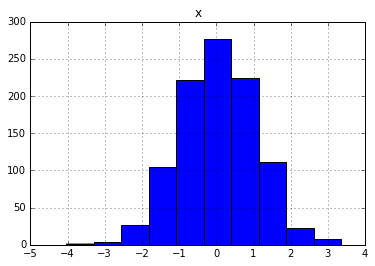

In [37]:
df3.hist(column='x');

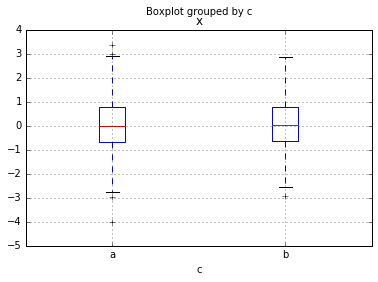

In [38]:
df3.boxplot(column='x', by='c', return_type='axes');